In [2]:
# Loading some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [4]:
# Load data into the Jupyter notebook
happ_df = pd.read_csv('fw9kjShd4x6PASAT\ACME-HappinessSurvey2020.csv')

In [7]:
happ_df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
 happ_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='Y', ylabel='Count'>

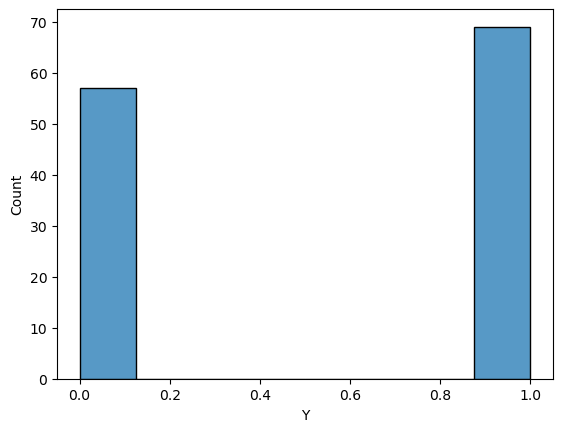

In [34]:
sns.histplot(x=happ_df['Y'])


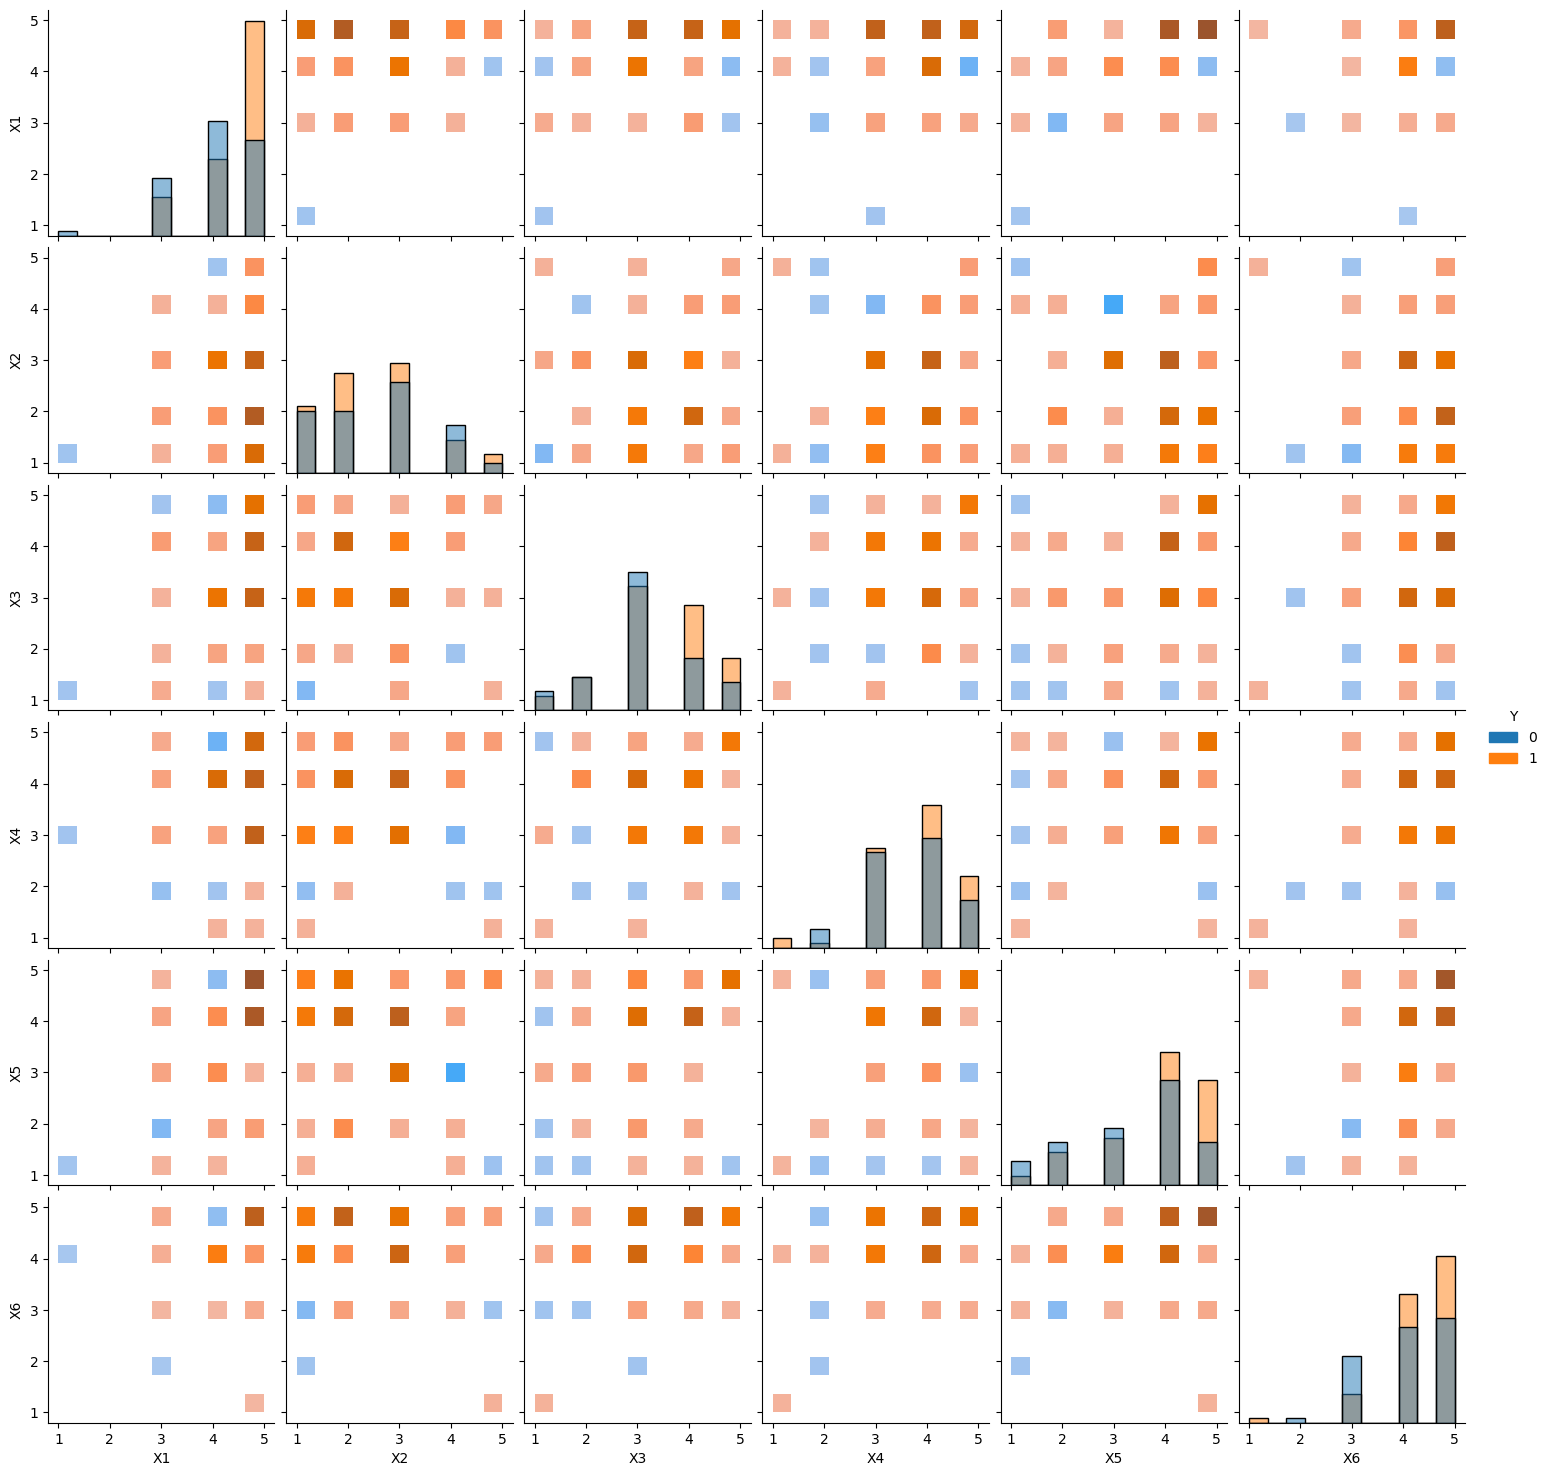

In [10]:
# Vizualizing the data
sns.pairplot(happ_df, kind = 'hist', hue = "Y")

In [12]:
# Seperating the features and the labels of the dataset
y = happ_df['Y']
X = happ_df.drop(['Y'], axis = 1)

In [27]:
# Shuffling the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 1)

In [28]:
#So our goal is to predict the happiness score based on the other 6 variables
# Lets use crossvalidation to split the data into training and test sets
from sklearn.model_selection import cross_val_score

# lets start with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
accuracy_scores = cross_val_score(logreg, X, y, cv=5)

# Accuracy scores averaged across the k-folds
accuracy_scores.mean()


0.5486153846153845

In [29]:
# Lets try a different model. We will use KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
accuracy_scores = cross_val_score(knn, X, y, cv=5)
accuracy_scores.mean()


0.54

In [30]:
#  Now lets try a decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
accuracy_scores = cross_val_score(dtree, X, y, cv=5)
accuracy_scores.mean()

0.5009230769230769

In [26]:
# Now lets try a random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
accuracy_scores = cross_val_score(rfc, X, y, cv=5)
accuracy_scores.mean()

0.5233846153846153

In [31]:
# Now lets try SVM
from sklearn.svm import SVC
svc = SVC()
accuracy_scores = cross_val_score(svc, X, y, cv=5)
accuracy_scores.mean()


0.54

In [52]:
# Lets try SVM with hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
svc = SVC(kernel='linear')
param_dist = {
    "C": stats.loguniform(1e-4, 1e4)
}
random_search = RandomizedSearchCV(
    svc, param_distributions=param_dist, n_iter=20, cv=5, scoring="accuracy"
)


In [53]:
accuracy_scores = cross_val_score(random_search, X, y, cv=5)
accuracy_scores.mean()

0.5800000000000001

In [64]:
# Lets try a stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log_loss", penalty="elasticnet")
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": stats.loguniform(1e-2, 1e0),
}

random_search = RandomizedSearchCV(sgd, param_distributions=param_dist, n_iter=100, cv=5, scoring="accuracy")

In [65]:
random_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(loss='log_loss',
                                           penalty='elasticnet'),
                   n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000265F764D210>,
                                        'average': [True, False],
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000265F6C72F10>},
                   scoring='accuracy')

In [66]:
y_pred = random_search.predict_log_proba(X)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y, 1*(y_pred >0.4)))
print(confusion_matrix(y, 1*(y_pred >0.4)))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [57]:
accuracy_scores = cross_val_score(random_search, X, y, cv=5)
accuracy_scores.mean()

0.5556923076923077